In [114]:
from joblib import load
from joblib import dump
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Assuming file paths for your two CSV files
file_path1 = 'DataSets/benign1.csv'
file_path2 = 'DataSets/DDOS1.csv'
file_path3 = 'DataSets/benign2.csv'
file_path4 = 'DataSets/DDOS2.csv'

# Read CSV files into DataFrames
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)
df3 = pd.read_csv(file_path3)
df4 = pd.read_csv(file_path4)




In [115]:
print(df1.columns)


Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE 

In [116]:


df_test = pd.concat([df1, df2], ignore_index=True, sort=False)
df_train = pd.concat([df3, df4], ignore_index=True, sort=False)
#df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Now, you can drop rows containing NaN values
#df.dropna(inplace=True)


In [117]:
df_train.index

RangeIndex(start=0, stop=20695, step=1)

In [118]:
# specify the class for Train data
df_train.loc[df_train.index < len(df3), 'Class'] = 1
df_train.loc[df_train.index >= len(df3), 'Class'] = 0
# put the actual class for testing the result
df_test.loc[df_test.index < len(df1), 'Class'] = 1
df_test.loc[df_test.index >= len(df1), 'Class'] = 0

In [119]:
# we used the top 15 important features in CICDDOS2019 dataset
selected_features = ['ACK Flag Count', 'Fwd Packet Length Min', 'Flow Duration',
       'Fwd Packet Length Max', 'URG Flag Count', 'Down/Up Ratio',
       'Bwd Packet Length Min', 'Init Fwd Win Bytes', 'Bwd Packet Length Max',
       'CWE Flag Count', 'Init Bwd Win Bytes', 'Fwd Packet Length Std',
       'Flow IAT Mean', 'Fwd Packets Length Total']
#selected_features = ['Protocol', 'ACK Flag Count', 'Fwd Packet Length Min', 'Flow Duration']

In [120]:
feature_mapping = {
    'Protocol': 'Protocol',
    'Flow Duration': 'Flow Duration',
    'Total Fwd Packets': 'Tot Fwd Pkts',
    'Total Backward Packets': 'Tot Bwd Pkts',
    'Fwd Packets Length Total': 'TotLen Fwd Pkts',
    'Bwd Packets Length Total': 'TotLen Bwd Pkts',
    'Fwd Packet Length Max': 'Fwd Pkt Len Max',
    'Fwd Packet Length Min': 'Fwd Pkt Len Min',
    'Fwd Packet Length Mean': 'Fwd Pkt Len Mean',
    'Fwd Packet Length Std': 'Fwd Pkt Len Std',
    'Bwd Packet Length Max': 'Bwd Pkt Len Max',
    'Bwd Packet Length Min': 'Bwd Pkt Len Min',
    'Bwd Packet Length Mean': 'Bwd Pkt Len Mean',
    'Bwd Packet Length Std': 'Bwd Pkt Len Std',
    'Flow Bytes/s': 'Flow Byts/s',
    'Flow Packets/s': 'Flow Pkts/s',
    'Flow IAT Mean': 'Flow IAT Mean',
    'Flow IAT Std': 'Flow IAT Std',
    'Flow IAT Max': 'Flow IAT Max',
    'Flow IAT Min': 'Flow IAT Min',
    'Fwd IAT Total': 'Fwd IAT Tot',
    'Fwd IAT Mean': 'Fwd IAT Mean',
    'Fwd IAT Std': 'Fwd IAT Std',
    'Fwd IAT Max': 'Fwd IAT Max',
    'Fwd IAT Min': 'Fwd IAT Min',
    'Bwd IAT Total': 'Bwd IAT Tot',
    'Bwd IAT Mean': 'Bwd IAT Mean',
    'Bwd IAT Std': 'Bwd IAT Std',
    'Bwd IAT Max': 'Bwd IAT Max',
    'Bwd IAT Min': 'Bwd IAT Min',
    'Fwd PSH Flags': 'Fwd PSH Flags',
    'Bwd PSH Flags': 'Bwd PSH Flags',
    'Fwd URG Flags': 'Fwd URG Flags',
    'Bwd URG Flags': 'Bwd URG Flags',
    'Fwd Header Length': 'Fwd Header Len',
    'Bwd Header Length': 'Bwd Header Len',
    'Fwd Packets/s': 'Fwd Pkts/s',
    'Bwd Packets/s': 'Bwd Pkts/s',
    'Packet Length Min': 'Pkt Len Min',
    'Packet Length Max': 'Pkt Len Max',
    'Packet Length Mean': 'Pkt Len Mean',
    'Packet Length Std': 'Pkt Len Std',
    'Packet Length Variance': 'Pkt Len Var',
    'FIN Flag Count': 'FIN Flag Cnt',
    'SYN Flag Count': 'SYN Flag Cnt',
    'RST Flag Count': 'RST Flag Cnt',
    'PSH Flag Count': 'PSH Flag Cnt',
    'ACK Flag Count': 'ACK Flag Cnt',
    'URG Flag Count': 'URG Flag Cnt',
    'CWE Flag Count': 'CWE Flag Count',
    'ECE Flag Count': 'ECE Flag Cnt',
    'Down/Up Ratio': 'Down/Up Ratio',
    'Avg Packet Size': 'Pkt Size Avg',
    'Avg Fwd Segment Size': 'Fwd Seg Size Avg',
    'Avg Bwd Segment Size': 'Bwd Seg Size Avg',
    'Fwd Avg Bytes/Bulk': 'Fwd Byts/b Avg',
    'Fwd Avg Packets/Bulk': 'Fwd Pkts/b Avg',
    'Fwd Avg Bulk Rate': 'Fwd Blk Rate Avg',
    'Bwd Avg Bytes/Bulk': 'Bwd Byts/b Avg',
    'Bwd Avg Packets/Bulk': 'Bwd Pkts/b Avg',
    'Bwd Avg Bulk Rate': 'Bwd Blk Rate Avg',
    'Subflow Fwd Packets': 'Subflow Fwd Pkts',
    'Subflow Fwd Bytes': 'Subflow Fwd Byts',
    'Subflow Bwd Packets': 'Subflow Bwd Pkts',
    'Subflow Bwd Bytes': 'Subflow Bwd Byts',
    'Init Fwd Win Bytes': 'Init Fwd Win Byts',
    'Init Bwd Win Bytes': 'Init Bwd Win Byts',
    'Fwd Act Data Packets': 'Fwd Act Data Pkts',
    'Fwd Seg Size Min': 'Fwd Seg Size Min',
    'Active Mean': 'Active Mean',
    'Active Std': 'Active Std',
    'Active Max': 'Active Max',
    'Active Min': 'Active Min',
    'Idle Mean': 'Idle Mean',
    'Idle Std': 'Idle Std',
    'Idle Max': 'Idle Max',
    'Idle Min': 'Idle Min',
}
mapped_features = [feature_mapping.get(feature, feature) for feature in selected_features]


# Display the mapped features
print("Mapped Features:")
print(mapped_features)

Mapped Features:
['ACK Flag Cnt', 'Fwd Pkt Len Min', 'Flow Duration', 'Fwd Pkt Len Max', 'URG Flag Cnt', 'Down/Up Ratio', 'Bwd Pkt Len Min', 'Init Fwd Win Byts', 'Bwd Pkt Len Max', 'CWE Flag Count', 'Init Bwd Win Byts', 'Fwd Pkt Len Std', 'Flow IAT Mean', 'TotLen Fwd Pkts']


In [121]:
df_train = df_train[0:3000]

print(df_train)

                                        Flow ID           Src IP  Src Port  \
0       192.168.100.5-34.98.104.183-49971-443-6    192.168.100.5     49971   
1       192.168.100.5-34.98.104.183-49971-443-6    34.98.104.183       443   
2      192.168.100.5-20.246.247.192-49972-443-6    192.168.100.5     49972   
3      192.168.100.5-20.246.247.192-49972-443-6    192.168.100.5     49972   
4      192.168.100.5-20.246.247.192-49974-443-6    192.168.100.5     49974   
...                                         ...              ...       ...   
2995  181.159.188.251-192.168.100.5-24593-139-6  181.159.188.251     24593   
2996     192.168.100.5-22.34.14.229-139-30691-6     22.34.14.229     30691   
2997     192.168.100.5-222.30.46.99-139-12452-6     222.30.46.99     12452   
2998   192.168.100.5-222.163.56.169-139-54273-6   222.163.56.169     54273   
2999  192.168.100.5-196.147.194.226-139-50001-6  196.147.194.226     50001   

              Dst IP  Dst Port  Protocol               Timestam

In [122]:
# Shuffle the DataFrame rows randomly
df_train = df_train.sample(frac=1, random_state=42).reset_index(drop=True)

In [123]:
target_name = 'Class'       # The output
y_train = df_train[target_name]
y_test = df_test[target_name]


In [124]:
# construct the train and test set
x_train = df_train[mapped_features]
x_test = df_test[mapped_features]

In [125]:
# scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [126]:
# Logistic Regression
logreg_model = LogisticRegression(max_iter=10000)
logreg_model.fit(X_train_scaled, y_train)
# save classifier
dump(logreg_model, 'lr_model_Ourdata.joblib')

['lr_model_Ourdata.joblib']

In [127]:
lr_classifier = load('lr_model_Ourdata.joblib')
y_pred_lr=logreg_model.predict(X_test_scaled)
#print model performance
print(accuracy_score(y_test,y_pred_lr))

0.99915345768748


In [128]:
# Instantiate SVM classifier
#fit model
#classifier=svm.SVC(kernel='linear',gamma='auto',C=2)
classifier=svm.SVC(kernel='linear',gamma=0.1 ,C=0.5, tol = 1e-2)
classifier.fit(X_train_scaled,y_train)

SVC(C=0.5, gamma=0.1, kernel='linear', tol=0.01)

In [129]:
# save classifier
dump(classifier, 'svm_model_Ourdata.joblib')

['svm_model_Ourdata.joblib']

In [130]:
# load the saved classifier
classifier_load = load('svm_model_Ourdata.joblib')
#print model performances
y_predict=classifier.predict(X_test_scaled)


print(accuracy_score(y_test,y_predict))

0.9995913244008524


In [131]:

# Save SVM model
#df_test['Prediction'] = y_predict

#Save LR model
df_test['Prediction'] = np.where(y_pred_lr == 1, 'Benign', 'Attack')
# Save the DataFrame to a CSV file
df_test.to_csv('DataSets/output.csv', index=False)

In [132]:
class_counts = pd.Series(y_test).value_counts()
print(class_counts)

Class
0.0    33491
1.0      766
Name: count, dtype: int64


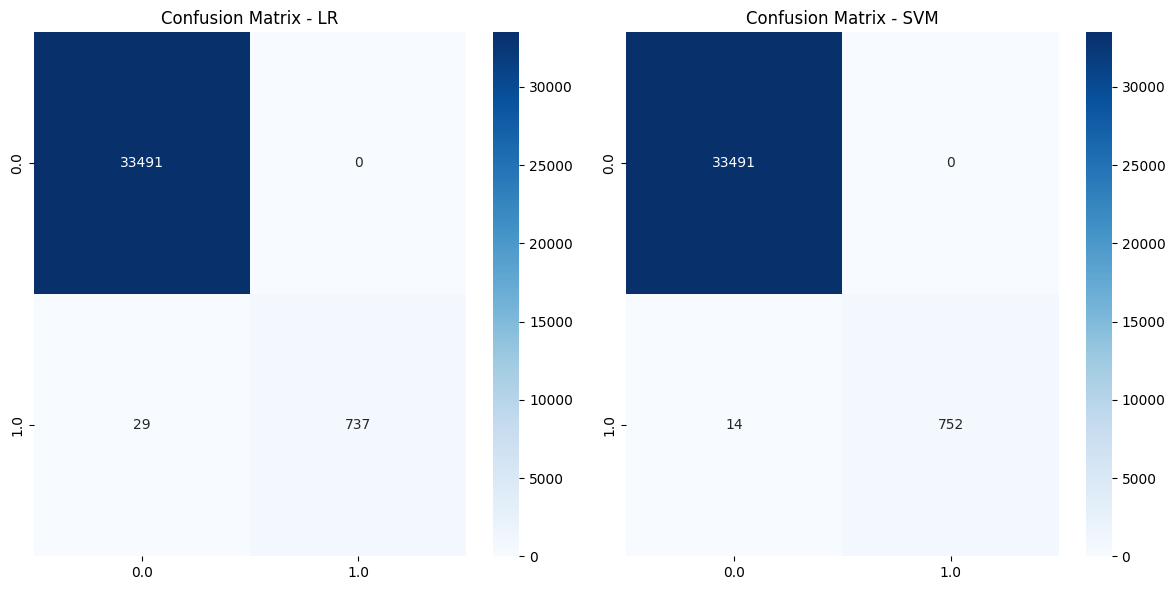

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(12, 6))

# Linear Regression Confusion Matrix
plt.subplot(1, 2, 1)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=class_counts.index, yticklabels=class_counts.index)
plt.title('Confusion Matrix - LR')

# SVM Confusion Matrix
plt.subplot(1, 2, 2)
conf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_counts.index, yticklabels=class_counts.index)
plt.title('Confusion Matrix - SVM')

# Adjust layout for better aesthetics
plt.tight_layout()

# Display the figure
plt.show()